In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [4]:
df = pd.read_excel("/content/fish_price_dataset.xlsx")

In [5]:
df.head()

,Weight,Height,Length,Width,Price
0,4.058131,13.330982,40.936455,15.090545,91.148746
1,9.531786,29.385543,39.758304,16.950221,161.947210
2,7.453942,44.282563,92.500366,8.757018,147.148071
3,6.187256,37.950120,39.963696,14.373111,114.660946
4,1.982177,41.295252,41.755978,13.576190,73.133559


In [6]:
print("\nSummary information of the DataFrame:")
print(df.info())
print(df.describe())
print(df.shape)


Summary information of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  998 non-null    float64
 1   Height  991 non-null    float64
 2   Length  997 non-null    float64
 3   Width   994 non-null    float64
 4   Price   1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None
           Weight      Height      Length       Width        Price
count  998.000000  991.000000  997.000000  994.000000  1000.000000
mean     5.151978   27.803154   60.188723   12.353992   108.133357
std      2.775159   13.180552   23.254859    4.298817    31.302120
min      0.544004    5.144822   20.000931    5.009801    33.580636
25%      2.717929   15.754038   40.936455    8.635486    83.701798
50%      5.211323   28.313544   60.048286   12.264189   108.895489
75%      7.560779   39.228813   80.720423   16.066554   132.719901
max      9.9973

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
        Missing Values  Percentage
Weight               2         0.2
Height               9         0.9
Length               3         0.3
Width                6         0.6
Price                0         0.0


In [8]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)

In [9]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nColumns with missing values and their percentage:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Columns with missing values and their percentage:
        Missing Values  Percentage
Weight               0         0.0
Height               0         0.0
Length               0         0.0
Width                0         0.0
Price                0         0.0


In [10]:
df.describe()

,Weight,Height,Length,Width,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.152097,27.807747,60.188302,12.353454,108.133357
std,2.772381,13.121134,23.219917,4.285894,31.302120
min,0.544004,5.144822,20.000931,5.009801,33.580636
25%,2.741746,15.848342,41.153682,8.672951,83.701798
50%,5.211323,28.313544,60.048286,12.264189,108.895489
75%,7.547357,39.121010,80.706681,16.051369,132.719901
max,9.997318,49.973618,99.825668,19.993366,188.594021


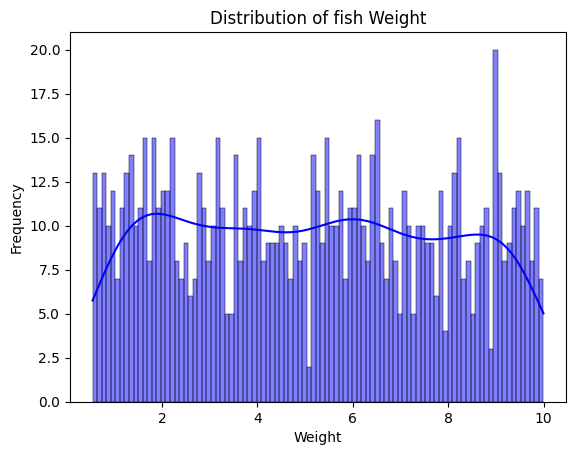

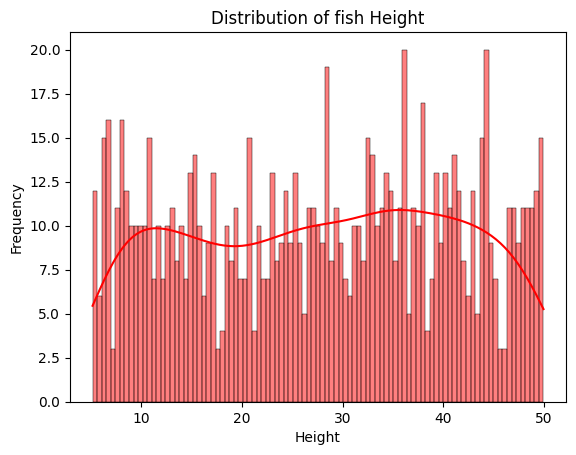

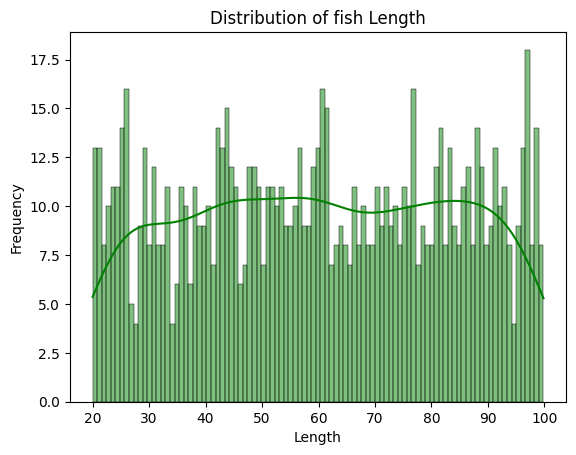

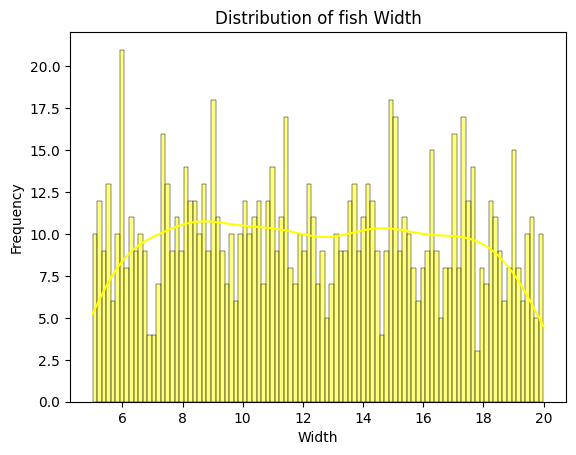

In [11]:
#plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, bins=99, color='blue')
plt.title("Distribution of fish Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['Height'], kde=True, bins=99, color='red')
plt.title("Distribution of fish Height")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['Length'], kde=True, bins=99, color='green')
plt.title("Distribution of fish Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()
sns.histplot(df['Width'], kde=True, bins=99, color='yellow')
plt.title("Distribution of fish Width")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

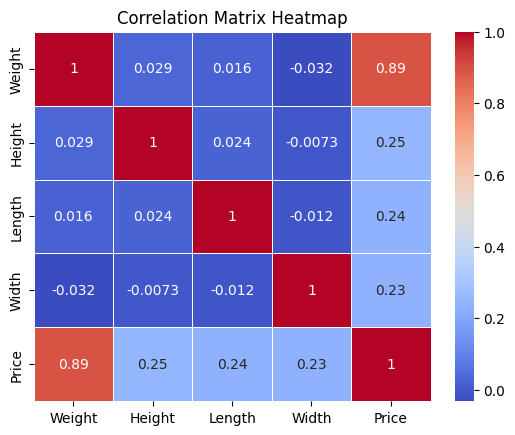

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
df.columns

Index(['Weight', 'Height', 'Length', 'Width', 'Price'], dtype='object')

In [14]:
y = df['Price']
x = df[['Weight', 'Height', 'Length', 'Width']]
#Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [15]:
# Select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train Model
model.fit(x_train,y_train)

LinearRegression()

In [18]:
model.intercept_

0.17908341919759607

In [19]:
model.coef_

array([10.06087857,  0.52266206,  0.29057172,  1.94741149])

In [16]:
y_pred = model.predict(x_test)
print("Predicted value = ",y_pred)
y_pred.shape

Predicted value =  [111.67851127  79.0554237  143.34843405  75.7749112  136.38431975
  80.98337245  75.4691231  138.33013009  55.82513643  86.28899903
 133.59335841 167.6200799  117.87841552 168.95282138 100.37965453
 139.38481241  80.83775737 102.6503416  127.50304361 131.93991664
  49.9949923   99.29653333  63.88118371 136.45878107  47.57886854
  91.20095877 107.28766462 109.29315321 129.96974193 140.77006553
 112.59865852 140.10538246 115.90970214 131.0813741  122.2876192
  87.05474224 119.85396202 152.13467545 144.92791888 133.28644955
 148.81944979 113.87215945 105.7822674  152.15986174  94.45521924
 109.38564071  62.97245908  60.2516051   79.36636974  89.01840372
 107.99371925  95.40153418 122.1667285   97.59088189 105.0165038
 107.30780168  86.04720206 107.35288524 134.1513363   90.6908425
 118.39436764 139.78010993  84.98964428 143.74493853  66.44252023
 100.7370783  142.24861732 101.40479145 125.46098106 111.35389988
  75.01212836 110.61729244 158.29271628 145.96090007  92.152

(200,)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
error_perc = mean_absolute_percentage_error(y_test,y_pred)
print("error % = " , (error_perc * 100))
accuracy = 100 - (error_perc)*100
print("accuracy % = " , (accuracy))

error % =  4.8255279840847205
accuracy % =  95.17447201591528


In [21]:
print("We got an accuracy of 95 percentage which is great.\nthere are no limitations or difficulties faced.")

We got an accuracy of 95 percentage which is great.
there are no limitations or difficulties faced.
